In [1]:
%matplotlib ipympl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors

# Visualisation of cars dataset

The plot is found at the bottom of this notebook. See the report for more information on the dataset.

In [2]:
df = pd.read_csv('cars.csv')
df.head(5)

,model,MPG,cylinders,horsepower,weigth,year,origin
0,chevrolet chevelle malibu,18.0,8,130,3504,70,US
1,buick skylark 320,15.0,8,165,3693,70,US
2,plymouth satellite,18.0,8,150,3436,70,US
3,amc rebel sst,16.0,8,150,3433,70,US
4,ford torino,17.0,8,140,3449,70,US


In [3]:
# functions used 

def get_dot_sizes(values, size_min, size_max, value_min=None, value_max=None):
    """
    Normalizes values to the range [size_min, size_max]
    """
    if value_min is None:
        value_min = values.min()
    if value_max is None:
        value_max = values.max()
    return ((values - value_min) / (value_max - value_min)) * (size_max - size_min) + size_min

def create_legend(ax, df, markers=['s', '^', 'o'], labels=['Europe', 'Japan', 'US']):
    """
    Create a legend for the different dot sizes and marker shapes
    """
    # generate dots for the values in hp_points 
    hp = df['horsepower']
    hp_points = np.array([50, 150, 250])
    sizes = ((hp_points - hp.min()) / (hp.max() - hp.min())) * (size_max - size_min) + size_min
    points = [ax.scatter([], [], [], s=s, c='gray', alpha=0.5, zorder=2) for s in sizes]
    points += [ax.scatter([], [], [], s=75, c='w', alpha=0.5, zorder=0)]
    points += [ax.scatter([], [], [], s=100, c='black', alpha=0.5, zorder=2, marker=m) for m in markers]
    
    # plot corresponding legend
    ax.legend(points, ['50 hp', '150 hp', '250 hp'] + [""] + labels, loc="center left", bbox_to_anchor=(1.07, 0.1))

def initialize_annotation(ax):
    """
    Initializes empty annotation to be changed interactively, and returns it.
    """
    annotation = ax.annotate(
        text       = "", 
        xy         = (0,0), 
        xytext     = (100, 100),
        textcoords ="offset points",
        bbox       = dict(boxstyle="round", fc="grey", alpha=0.6, ec='gray'),
        arrowprops = dict(arrowstyle="-", color='gray'), 
        fontsize   = 10, 
        color      ='w'
    )
    return annotation


def update_annot_EU(ind):
    """
    Updates annotation's position and text.
    """
    pos = scatter_EU.get_offsets()[ind["ind"][0]]
    annot_EU.xy = pos
    n = np.random.choice(ind["ind"])
    text = f"{data_EU[n][0]}, {data_EU[n][-1]} " 
    annot_EU.set_text(text)

def update_annot_JP(ind):
    """
    Updates annotation's position and text.
    """
    pos = scatter_JP.get_offsets()[ind["ind"][0]]
    annot_JP.xy = pos
    n = np.random.choice(ind["ind"])
    text = f"{data_JP[n][0]}, {data_JP[n][-1]} " 
    annot_JP.set_text(text)

def update_annot_US(ind):
    """
    Updates annotation's position and text.
    """
    pos = scatter_US.get_offsets()[ind["ind"][0]]
    annot_US.xy = pos
    n = np.random.choice(ind["ind"])
    text = f"{data_US[n][0]}, {data_US[n][-1]} "
    annot_US.set_text(text)

def on_plot_hover(event):
    """
    Checks if user hovers over point.
    """
    if event.inaxes == ax:

        cont, ind = scatter_EU.contains(event)
        if cont:
            update_annot_EU(ind)
            annot_EU.set_visible(True)
            annot_JP.set_visible(False)
            annot_US.set_visible(False)
        else:
            annot_EU.set_visible(False)

        cont, ind = scatter_JP.contains(event)
        if cont:
            update_annot_JP(ind)
            annot_JP.set_visible(True)
            annot_EU.set_visible(False)
            annot_US.set_visible(False)
        else:
            annot_JP.set_visible(False)
            
        cont, ind = scatter_US.contains(event)
        if cont:
            update_annot_US(ind)
            annot_US.set_visible(True)
            annot_EU.set_visible(False)
            annot_JP.set_visible(False)
        else:
            annot_US.set_visible(False)
        fig.canvas.draw_idle()

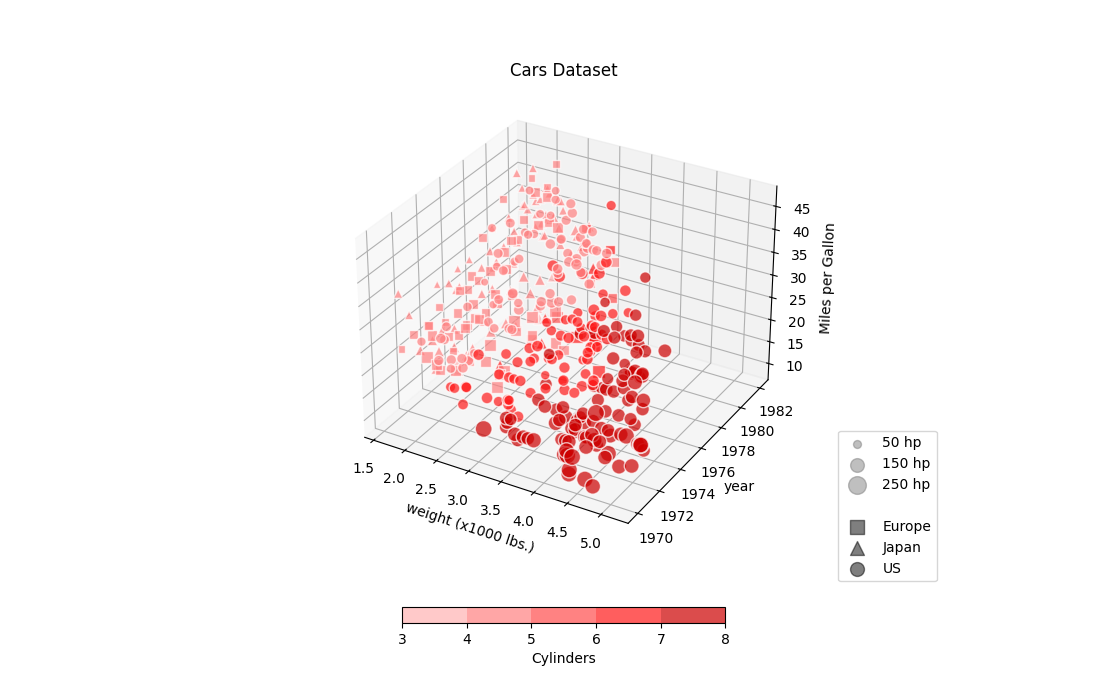

In [4]:
cmap = colors.ListedColormap(['#ffb3b3', '#ff8080', '#ff4d4d', '#ff1a1a', '#cc0000'])

fig = plt.figure(figsize=(11, 7))
ax = plt.axes(projection ="3d")

# dotsizes are normalized to the range [size_min, size_max]
size_min, size_max = 30, 150  

# list of marker shapes, s=square, ^=triangle, o=circle
markers = ['s', '^', 'o'] 

# plot scatterplot for each country (x=weight, y=year, z=MPG)
grouped_df = df.groupby('origin')
i = 0 
for label, group in grouped_df:
    
    dot_sizes = get_dot_sizes(group['horsepower'], size_min, size_max, df['horsepower'].min(), df['horsepower'].max())
    scatter = ax.scatter(
                     group['weigth']/1000, 
                     group['year'],
                     group['MPG'], 
                     c=group['cylinders'], 
                     cmap=cmap, 
                     s=dot_sizes,
                     alpha=0.7, 
                     edgecolors='w',
                     marker=markers[i],
                     vmin=3, vmax=8
          )

    # need to save data in seperate vars for dynamic annotations
    if label == 'Japan':
        scatter_JP = scatter
        data_JP = group.to_numpy()
        annot_JP = initialize_annotation(ax)
        annot_JP.set_visible(False)
        
    elif label == "Europe":
        scatter_EU = scatter
        data_EU = group.to_numpy()
        annot_EU = initialize_annotation(ax)
        annot_EU.set_visible(False)
        
    elif label == "US":
        scatter_US = scatter
        data_US = group.to_numpy()
        annot_US = initialize_annotation(ax)
        annot_US.set_visible(False)
        
    i += 1

# colorbar
cbar = fig.colorbar(scatter_US, ax=ax,fraction=0.03, pad=0.1, orientation='horizontal')
cbar.set_label('Cylinders')

# axis labels
ax.set_yticks([70, 72, 74, 76, 78, 80, 82], [1970, 1972, 1974, 1976, 1978, 1980, 1982])                   
ax.set_xlabel('weight (x1000 lbs.)')
ax.set_ylabel('year')
ax.set_zlabel('Miles per Gallon')

ax.set_title('Cars Dataset') 

# need for interactive annotations
fig.canvas.mpl_connect('motion_notify_event', on_plot_hover)

# legend for point sizes & marker shapes
create_legend(ax, df)

plt.show()

In [5]:
plt.close('all') # run this every now and then to avoid too many open figures